In [3]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [4]:
nd_benchmarks = {}
for name in ["literature_nd","random_nd"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    nd_benchmarks[name] = b

In [7]:
tool_set = ["no.owl#a","yes.owl#a","yes.seminator-1-1","yes.seminator#def"]

This notebook uses the same data as [Results-owl-best](Results-owl-best.ipynb). It shows the results for owl without the _best of Owl_ approach and uses the default setting, which is equivalent to `ltl2ldgba -a`.

In [8]:
gather_cumulative(nd_benchmarks, tool_set=tool_set)

,literature_nd,random_nd
tool,,
no.owl#a,322,6229
yes.owl#a,250,4675
yes.seminator#def,230,3956
yes.seminator-1-1,297,7020


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [9]:
gather_mins(nd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The older versions of Seminator reached the 30s timeout in one case for formulae from literature. Otherwise, most of the execution times were below 1s for all tools.

In [10]:
for name, b in nd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max().loc[tool_set])

literature_nd


,timeout,parse error,incorrect,crash,no output
yes.seminator-1-1,1,0,0,0,0
yes.seminator-1-2,1,0,0,0,0


tool
no.owl#a              0.29772
yes.owl#a             1.52884
yes.seminator-1-1    30.01760
yes.seminator#def     0.19749
dtype: float64

random_nd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
no.owl#a             3.979390
yes.owl#a            4.371700
yes.seminator-1-1    7.845140
yes.seminator#def    0.418309
dtype: float64

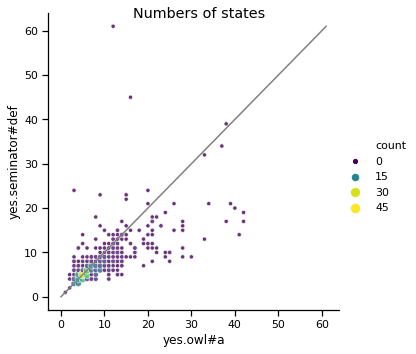

In [11]:
b.seaborn_scatter_plot("yes.owl#a","yes.seminator#def", include_equal=True)

In [12]:
for n, b in nd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_nd


,no.owl#a,yes.owl#a,yes.seminator-1-1,yes.seminator#def,V
no.owl#a,nan,0,5,2,7
yes.owl#a,20,nan,15,7,42
yes.seminator-1-1,15,4,nan,7,26
yes.seminator#def,18,13,12,nan,43


random_nd


,no.owl#a,yes.owl#a,yes.seminator-1-1,yes.seminator#def,V
no.owl#a,nan,0,224,75,299
yes.owl#a,489,nan,330,132,951
yes.seminator-1-1,274,162,nan,45,481
yes.seminator#def,422,352,426,nan,1200
